### AutoRegressive Integrated Moving Average (ARIMA)

#### The AR(p): Autoregression
* A regression model that utilizes the dependent relationship between a current observation and observations over a previous period




#### The I(d): Integrated

* Differencing of observations (subtractring an observation from an observation at the previous time step) in order to make the time series stationary.

#### MA (q): Moving Average.

* A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. 

#### Stationary vs Non-Stationary Data

* A Stationary series has constant mean and variance over time.
* There are ways to test for Stationary trends, for example, test the variance: Augmented Dickey-Fuller
   

#### Notes on autocorrelation

A unit root refers to a stochastic trend in time series. Let me explain this with an easy example.
A time series is a process that can be written in its components which contains ‘roots’. 
For example:
vt=c+a1vt−1+ϵt−1
The coefficient a1 is a root. You can interpret this process/formula as ‘the value of today depends on the value of yesterday and some randomness we can’t predict’. We expect this process to always converge back to the value of c. 
Try this is out with an example: suppose c=0 and a1=0.5. If yesterday (vt−1) the value was 100, then we expect that today the value will be around 50. 
Tomorrow, we expect the value to be 25 and so on. You see that this series will ‘come home’, in this case meaning it will converge back to the value of 
c. When one of the roots is a unit, i.e. equal to 1 (in this example when 
a1=1), then this series will not recover to its origin. You can see this by using the example given above. 
That is why the concepts of unit roots and unit root tests are useful: it give us insights in whether the time series will recover to its expected value. If this is not the case, then the process will be very susceptible to shocks and hard to predict and control.
Note that there are more rigorous mathematical explanations on the web about unit roots like this
one.

In [64]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
milk = pd.read_csv('milkl.csv')
milk['Month'] = pd.to_datetime(milk['Month'])
milk.set_index("Month", inplace = True)
milk.head()

,Monthly_Pounds_Per_Cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


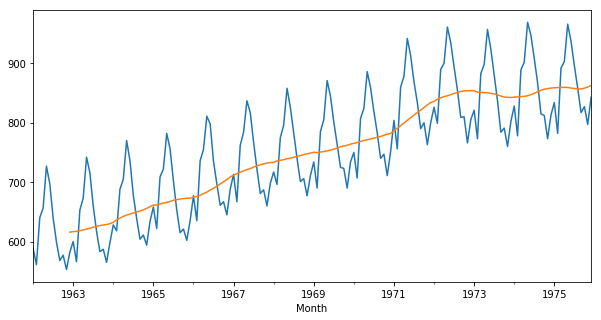

In [65]:

milk['1y'] = milk['Monthly_Pounds_Per_Cow'].rolling(12).mean()
milk['Monthly_Pounds_Per_Cow'].plot(figsize = (10,5))
milk['1y'].plot()


C:\Users\fealg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


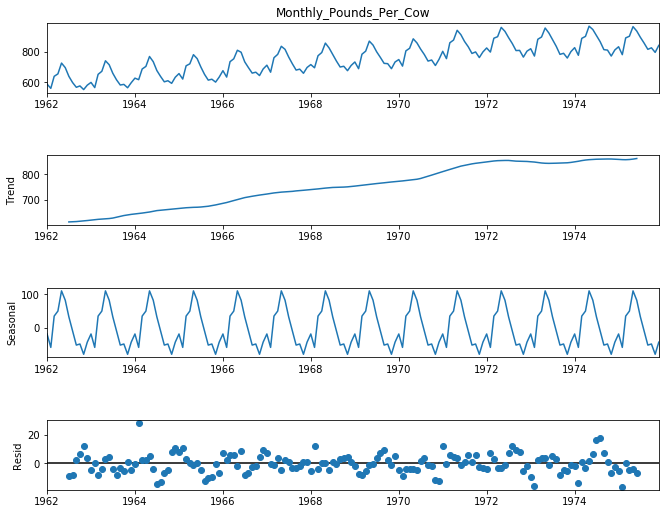

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
time_series = milk['Monthly_Pounds_Per_Cow']
#time_series = time_series.rolling(12).mean()
decomp = seasonal_decompose(time_series, freq = 12)
decomp = decomp.plot()
decomp.set_size_inches(10,8)

### Test for Stationary or not Stationary
* Use the Augmented Dickey-Fuller
* The null hypothesis the alpha = 1
    * alpha 1 means is non-stationary
    * Alternative hypothesis says, it is stationary
* Important keyterms: constant mean and constant variance
    


In [67]:
from statsmodels.tsa.stattools import adfuller 

In [68]:
dick_fuller = adfuller(milk['Monthly_Pounds_Per_Cow'])

In [69]:
def adf_check(time_series):
    dick_fuller = adfuller(time_series)
    print ("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statisci', 'p-value', '# of lags', '# of Obs']
    for value, label in zip(dick_fuller, labels):
        print (label + " : "+str(value))
    if dick_fuller[1] <= .05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Week evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has unit root, it is non-stationary")

In [70]:
adf_check(milk['Monthly_Pounds_Per_Cow'])

Augmented Dicky-Fuller Test
ADF Test Statisci : -1.3038115874221263
p-value : 0.6274267086030331
# of lags : 13
# of Obs : 154
Week evidence against null hypothesis
Fail to reject null hypothesis
Data has unit root, it is non-stationary


#### Differencing 

In [85]:
milk['First_Diff'] = milk['Monthly_Pounds_Per_Cow'] - milk['Monthly_Pounds_Per_Cow'].shift(1)
milk['Second_Diff'] = milk['First_Diff']-milk['First_Diff'].shift(1)


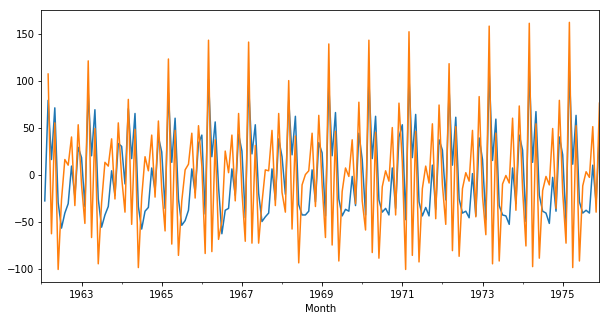

In [86]:
# Monthly Difference
milk['First_Diff'].plot(figsize = (10,5))
milk['Second_Diff'].plot(figsize = (10,5))

In [87]:
adf_check(milk['Second_Diff'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statisci : -14.327873645603423
p-value : 1.112698933207948e-26
# of lags : 11
# of Obs : 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


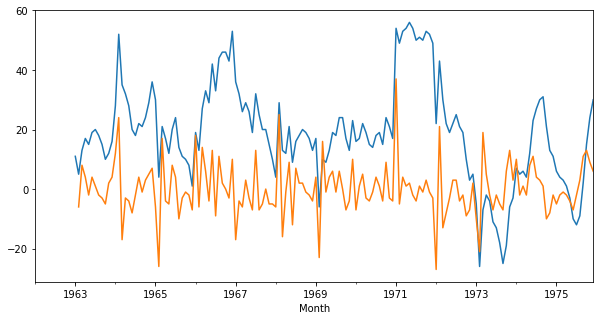

In [88]:
# Seasonal Difference
milk['Seasonal_Diff'] = milk['Monthly_Pounds_Per_Cow'] - milk['Monthly_Pounds_Per_Cow'].shift(12)
milk['Seasonal_Diff_2'] = milk['First_Diff'] - milk['First_Diff'].shift(12)
milk['Seasonal_Diff'].plot(figsize = (10,5))
milk['Seasonal_Diff_2'].plot(figsize = (10,5))


In [89]:
adf_check(milk['Seasonal_Diff_2'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statisci : -5.038002274921974
p-value : 1.865423431878921e-05
# of lags : 11
# of Obs : 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


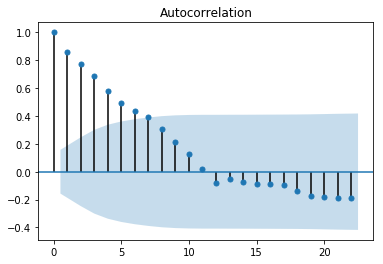

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig_first = plot_acf(milk['Seasonal_Diff'].dropna())

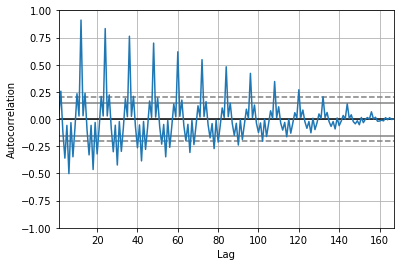

In [94]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(milk['First_Diff'].dropna())

In [99]:
from statsmodels.tsa.arima_model import ARIMA

In [101]:
model =sm.tsa.statespace.SARIMAX(milk['Monthly_Pounds_Per_Cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\fealg\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\fealg\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:               Monthly_Pounds_Per_Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Tue, 26 May 2020   AIC                           1074.131
Time:                                      18:07:18   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

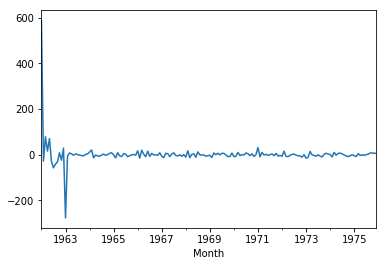

In [103]:
results.resid.plot()

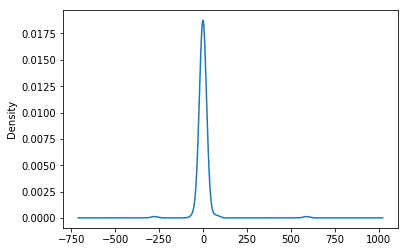

In [104]:
results.resid.plot(kind = 'kde')

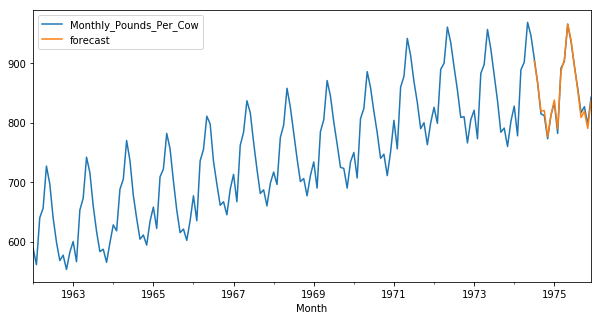

In [107]:
milk['forecast'] = results.predict(start = 150, end = 168)
milk[['Monthly_Pounds_Per_Cow', 'forecast']].plot(figsize = (10,5))

In [108]:
milk.tail()

,Monthly_Pounds_Per_Cow,1y,First_Diff,Seasonal_Diff,Second_Diff,Seasonal_Diff_2,forecast
Month,,,,,,,
1975-08-01,858,856.750000,-38.0,-9.0,3.0,3.0,855.358648
1975-09-01,817,856.916667,-41.0,2.0,-3.0,11.0,808.841372
1975-10-01,827,858.166667,10.0,15.0,51.0,13.0,819.323185
1975-11-01,797,860.166667,-30.0,24.0,-40.0,9.0,790.427530
1975-12-01,843,862.666667,46.0,30.0,76.0,6.0,837.063622


In [111]:
from pandas.tseries.offsets import DateOffset
future_dates =[milk.index[-1] +  DateOffset(months=x) for x in range(1,24)]
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [114]:
fut_df = pd.DataFrame(index = future_dates, columns = milk.columns)

In [115]:
final_df = pd.concat([milk, fut_df])

In [116]:
final_df.tail()

,Monthly_Pounds_Per_Cow,1y,First_Diff,Seasonal_Diff,Second_Diff,Seasonal_Diff_2,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


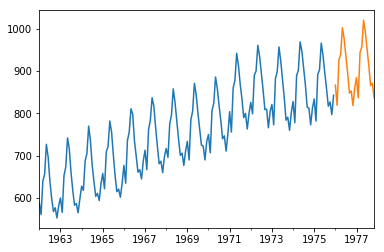

In [118]:
final_df['forecast']=results.predict(start = 168, end = 192)
final_df['Monthly_Pounds_Per_Cow'].plot()
final_df['forecast'].plot()